## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ (yet two data surprisignly ending x00 April 14th )  
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [15]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,China,United Kingdom,France,Spain,Italy,Belgium,Germany,Brazil,Netherlands,Turkey,Iran,Sweden,Canada,Switzerland,Ireland
4/15/20,2494,1,761,1438,652,578,283,510,204,189,115,94,170,52,65,38
4/16/20,4591,0,861,753,607,525,417,248,188,181,125,92,130,143,42,42
4/17/20,3857,1290,847,761,687,575,306,300,217,144,126,89,67,58,46,44


### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 66.5 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 32.7 MB/s eta 0:00:01    |███▌                            | 2.9 MB 32.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 11.7 MB/s eta 0:00:01


In [3]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0    930      0 --:--:-- --:--:-- --:--:--   930
100 57932  100 57932    0     0   178k      0 --:--:-- --:--:-- --:--:--  178k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
Country/Region,,,,,,,,,,,,,
US,9619,10783,12722,14695,16478,18586,20462,22019,23528,25831,28325,32916,36773
Italy,15887,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745
Spain,12641,13341,14045,14792,15447,16081,16606,17209,17756,18056,18708,19315,20002
France,8078,8911,10328,10869,12210,13197,13832,14393,14967,15729,17167,17920,18681
United Kingdom,4934,5373,6159,7097,7978,8958,9875,10612,11329,12107,12868,13729,14576
Belgium,1447,1632,2035,2240,2523,3019,3346,3600,3903,4157,4440,4857,5163
Iran,3603,3739,3872,3993,4110,4232,4357,4474,4585,4683,4777,4869,4958
China,3210,3212,3212,3213,3215,3216,3219,3219,3221,3221,3222,3222,4512
Germany,1584,1810,2016,2349,2607,2767,2736,3022,3194,3294,3804,4052,4352


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
Country/Region,,,,,,,,,,,,
US,1164,1939,1973,1783,2108,1876,1557,1509,2303,2494,4591,3857
China,2,0,1,2,1,3,0,2,0,1,0,1290
United Kingdom,439,786,938,881,980,917,737,717,778,761,861,847
France,833,1417,541,1341,987,635,561,574,762,1438,753,761
Spain,700,704,747,655,634,525,603,547,300,652,607,687
Italy,636,604,542,610,570,619,431,566,602,578,525,575
Belgium,185,403,205,283,496,327,254,303,254,283,417,306
Germany,226,206,333,258,160,-31,286,172,100,510,248,300
Brazil,78,122,133,131,107,67,99,105,204,204,188,217


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1164,1939,1973,1783,2108,1876,1557,1509,2303,2494,4591,3857"
data-datasets="2,0,1,2,1,3,0,2,0,1,0,1290"
data-datasets="439,786,938,881,980,917,737,717,778,761,861,847"
data-datasets="833,1417,541,1341,987,635,561,574,762,1438,753,761"
data-datasets="700,704,747,655,634,525,603,547,300,652,607,687"
data-datasets="636,604,542,610,570,619,431,566,602,578,525,575"
data-datasets="185,403,205,283,496,327,254,303,254,283,417,306"
data-datasets="226,206,333,258,160,-31,286,172,100,510,248,300"
data-datasets="78,122,133,131,107,67,99,105,204,204,188,217"
data-datasets="101,234,147,148,115,132,94,86,122,189,181,144"
data-datasets="75,76,87,96,98,95,97,98,107,115,125,126"
data-datasets="136,133,121,117,122,125,117,111,98,94,92,89"
data-datasets="76,114,96,106,77,17,12,20,114,170,130,67"
data-datasets="46,29,25,41,25,48,39,32,75,52,143,58"
data-datasets="50,56,74,53,54,34,70,32,36,65,42,46"
data-datasets="16,36,25,28

In [9]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Belgium,Brazil,Canada,Canada,Chile,China,Colombia,...,Romania,Russia,Serbia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/6/20,21,4,16,185,78,31,46,3,2,11,...,25,2,7,700,76,50,75,1,439,1164
4/7/20,20,8,23,403,122,3,29,6,0,4,...,21,11,3,704,114,56,76,7,786,1939
4/8/20,12,7,30,205,133,0,25,5,1,4,...,23,5,4,747,96,74,87,7,938,1973
4/9/20,30,9,22,283,131,47,41,9,2,15,...,28,13,1,655,106,53,96,5,881,1783
4/10/20,21,10,24,496,107,22,25,8,1,11,...,22,18,5,634,77,54,98,12,980,2108
4/11/20,19,1,18,327,67,31,48,8,3,20,...,21,12,3,525,17,34,95,4,917,1876
4/12/20,18,7,13,254,99,21,39,7,0,9,...,25,24,6,603,12,70,97,10,737,1557
4/13/20,20,7,18,303,105,17,32,2,2,3,...,15,18,5,547,20,32,98,10,717,1509
4/14/20,13,5,16,254,204,43,75,10,0,15,...,20,22,9,300,114,36,107,5,778,2303
4/15/20,10,9,9,283,204,51,52,2,1,4,...,21,28,5,652,170,65,115,10,761,2494


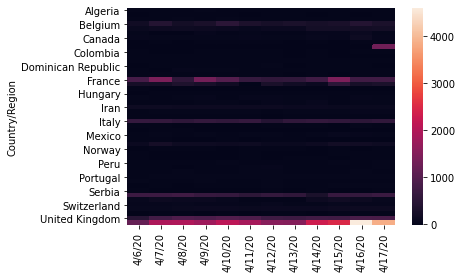

In [10]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

47 18.916666666666668


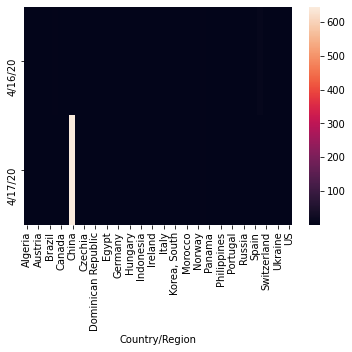

In [11]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [12]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/17/20
Country/Region,
China,10.915385
Russia,1.995575
US,1.632436
Chile,1.531646
Brazil,1.513633
Serbia,1.480769
Peru,1.375000
Ireland,1.359551
Hungary,1.305085


In [13]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [14]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.7 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 10.1 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=44e24134f7c0e53ea87e6435cda46f2414bf6b1aaaff13c994bea1a5c3325735
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
